## Check why NMF is unbalanced, possibly find another implementation
## VGG_BN => Re-run images
## Color t

In [1]:
%load_ext autoreload
%autoreload 2
from pipeline import get_maps, normalized, normalized_k, normalized_all, gen_maps
from helpers import load_image, load_image2

import numpy as np

import matplotlib.pyplot as plt
#%autoreload 2
%matplotlib inline

#Datastructure
from collections import OrderedDict

import skimage


DATA_PATH = '../data/'

In [2]:
source_path='/city/7.jpg'
style_path='/city/3.jpg'
K = 5

#Hs, Ws = gen_maps(source_path, style_path, K, up_width=400, layer_name="conv3_4", normalize_per_k=True)


In [38]:
def image_stats(image):
    l = image[:,:,0]
    a = image[:,:,1]
    b = image[:,:,2]
    (lMean, lStd) = (l.mean(), l.std())
    (aMean, aStd) = (a.mean(), a.std())
    (bMean, bStd) = (b.mean(), b.std())
    
    # return the color statistics
    return (lMean, lStd, aMean, aStd, bMean, bStd)

#https://www.pyimagesearch.com/2014/06/30/super-fast-color-transfer-images/
#source = color stats we want to match to target
def color_transfer(source, target):
    # compute color statistics for the source and target images
    (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
    (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
    
    # subtract the means from the target image
    l = target[:, :, 0]
    a = target[:, :, 1]
    b = target[:, :, 2]
    
    l -= lMeanTar
    a -= aMeanTar
    b -= bMeanTar
    
    l = (lStdTar / lStdSrc) * l
    a = (aStdTar / aStdSrc) * a
    b = (bStdTar / bStdSrc) * b
    
    l += lMeanSrc
    a += aMeanSrc
    b += bMeanSrc
    
    l = np.clip(l, 0, 255)
    a = np.clip(a, 0, 255)
    b = np.clip(b, 0, 255)
    
    transfer = np.array([l, a, b])
    transfer = np.swapaxes(transfer, axis1=0, axis2=2)
    transfer = np.swapaxes(transfer, axis1=0, axis2=1)
    
    transfer = skimage.color.lab2xyz(transfer)
    transfer = skimage.color.xyz2rgb(transfer)
    
    # return the color transferred image
    return transfer


float64


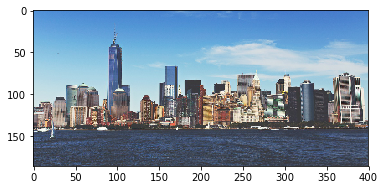

In [4]:
img_content = load_image2(DATA_PATH + source_path, width=400)
img_style = load_image2(DATA_PATH + style_path, width=400)


print(img_content.dtype)
plt.imshow(img_content)

uint8


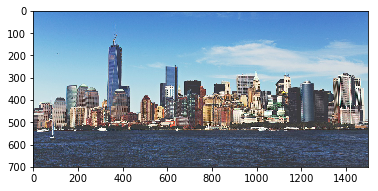

In [5]:
img_content = skimage.io.imread(DATA_PATH + source_path)
img_style = skimage.io.imread(DATA_PATH + style_path)
print(img_content.dtype)
plt.imshow(img_content)

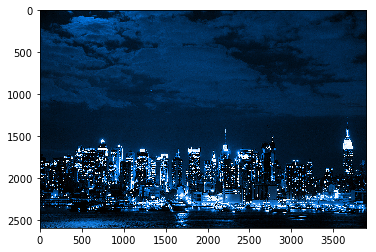

In [6]:
plt.imshow(img_style)

In [41]:
img_c_lab = skimage.color.rgb2xyz(img_content)
img_c_lab = skimage.color.xyz2lab(img_c_lab)

img_s_lab = skimage.color.rgb2xyz(img_style)
img_s_lab = skimage.color.xyz2lab(img_s_lab)



-51.208236885093264

In [42]:
img_c_lab[:, :, 2].min()
img_c_lab.min()

-51.208236885093264

C:\Users\Adan\Anaconda3\envs\tensorflow\lib\site-packages\skimage\color\colorconv.py:985: UserWarning: Color data out of range: Z < 0 in 1780 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


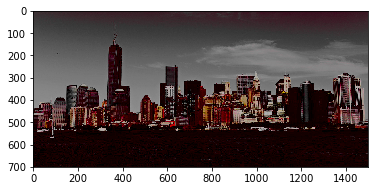

In [39]:
#
t = color_transfer(img_s_lab, img_c_lab)
plt.imshow(t)